In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv('titanic_sample.csv')

In [3]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [4]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [5]:
X_train,X_test,y_train,y_test= train_test_split(df.drop(columns=['Survived']), df['Survived'],test_size=0.2, random_state=91)

In [6]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [26]:
def calculate_mean(df, column):
    column=df[column]
    mean =column.mean()
    return mean

In [27]:
mean_age = calculate_mean(df, 'Age')
print("Mean Age:", mean_age)

Mean Age: 29.69911764705882


In [ ]:
mean_age = calculate_mean(df, 'Fare')
print("Mean Fare:", Fate)

In [28]:
def end_of_dist_imputation(series):
    non_missing = series.dropna()
    extreme_value = non_missing.mean() + (3 * non_missing.std())
    return series.fillna(extreme_value)

In [29]:
X_train['Age_ed'] = end_of_dist_imputation(X_train['Age'])

In [30]:
X_train['Fare_ed'] = end_of_dist_imputation(X_train['Fare'])

In [31]:
X_train

,Age,Fare,Family,Age_ed,Fare_ed
98,34.0,NaN,1,34.0,177.824753
523,44.0,57.9792,1,44.0,57.979200
483,63.0,9.5875,0,63.0,9.587500
586,47.0,15.0000,0,47.0,15.000000
713,29.0,9.4833,0,29.0,9.483300
...,...,...,...,...,...
861,21.0,11.5000,1,21.0,11.500000
210,24.0,7.0500,0,24.0,7.050000
874,28.0,24.0000,1,28.0,24.000000
686,14.0,39.6875,5,14.0,39.687500


In [12]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after end of distribution imputation: ', X_train['Age_ed'].var())


print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after end of distribution imputation: ', X_train['Fare_ed'].var())


Original Age variable variance:  212.0659279132427
Age Variance after end of distribution imputation:  1562.0781361229483
Original Fare variable variance:  2374.5429186689344
Fare Variance after end of distribution imputation:  21145.907724387413


C:\Users\Alina\AppData\Local\Temp\ipykernel_14608\524435319.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], hist=False, kde=True, bins=5, color='blue', hist_kws={'edgecolor': 'black'})
C:\Users\Alina\AppData\Local\Temp\ipykernel_14608\524435319.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2

<AxesSubplot:xlabel='Age_ed', ylabel='Density'>

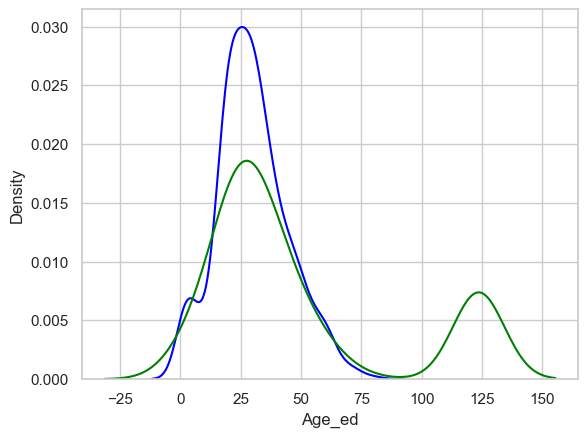

In [13]:
#distribution of age before and after replacing mean and median values
sns.set(style="whitegrid")  # Set the style of the plot
sns.distplot(X_train['Age'], hist=False, kde=True, bins=5, color='blue', hist_kws={'edgecolor': 'black'})
sns.distplot(X_train['Age_ed'], hist=False, kde=True, bins=5, color='green', hist_kws={'edgecolor': 'black'})


C:\Users\Alina\AppData\Local\Temp\ipykernel_14608\3881442482.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'], hist=False, kde=True, bins=5, color='blue', hist_kws={'edgecolor': 'black'})
C:\Users\Alina\AppData\Local\Temp\ipykernel_14608\3881442482.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147

<AxesSubplot:xlabel='Fare_ed', ylabel='Density'>

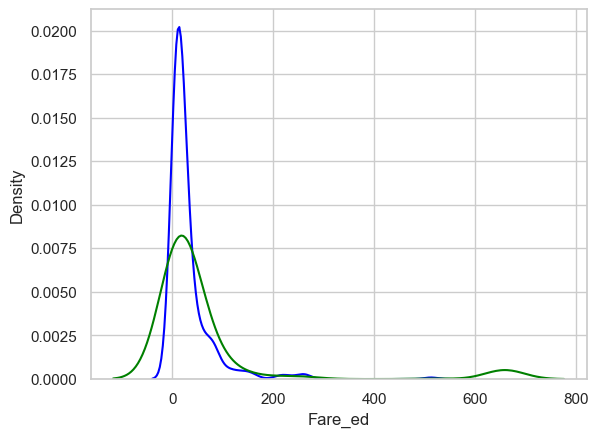

In [14]:
#distribution of fare before and after replacing with end of distribution values
sns.set(style="whitegrid")  # Set the style of the plot
sns.distplot(X_train['Fare'], hist=False, kde=True, bins=5, color='blue', hist_kws={'edgecolor': 'black'})
sns.distplot(X_train['Fare_ed'], hist=False, kde=True, bins=5, color='green', hist_kws={'edgecolor': 'black'})


<AxesSubplot:>

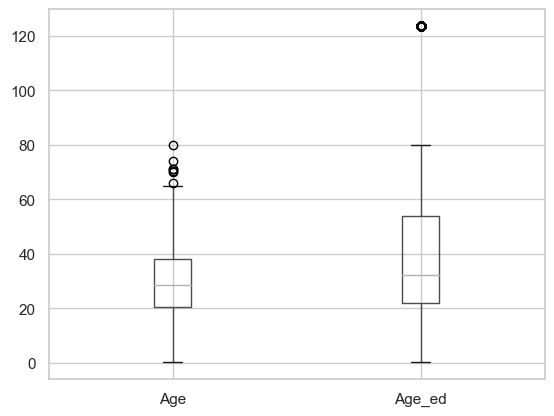

In [15]:

X_train[['Age', 'Age_ed']].boxplot()

<AxesSubplot:>

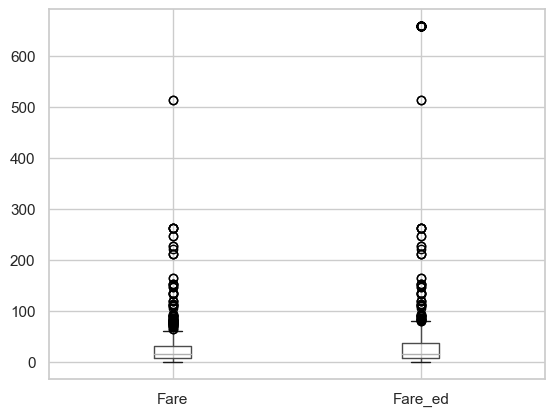

In [16]:
X_train[['Fare', 'Fare_ed']].boxplot()